# Neuro-nutritionist and neuro-trainer

**Step 1 Create a knowledge base**

As a knowledge base, we will use two YouTube videos about proper nutrition and exercise from an expert who explains in detail from a scientific point of view.
We will use Riverside.fm to convert the videos to text.
We will save the transcript to [google doc 1](https://docs.google.com/document/d/1MbpWF_gT1szG-SXyeWtwW3uJaTjXn4sPwXb2MNPfkZw/edit?usp=sharing) and [google doc 2](https://docs.google.com/document/d/1zNEDstKIZY3NSRwtMFwTHPD7CXGroR13gJYx2VfColI/edit?usp=sharing).

**Step 2 Prepare data for training**

Check the transcript for errors and typos. Correct them to improve the quality of the data.
Break the text into logical parts.
Structure the google document. ChatGPT will help with this.
We write him the following request: “A task for you. I will send you a document for training a neuro-assistant, and you should reword the document more concisely, correct errors and structure it. Okay?”.
Then we send the text in fragments and get the transformed and shortened version.

**Step 3 Create and customize the AI model**

Installing libraries

In [ ]:
!pip install openai gradio tiktoken langchain langchain-openai langchain-community chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.0 MB/s eta 0:00:00

Installing the key for OpenAI

In [ ]:
import getpass # for working with passwords
import os # to work with environment and file system

# Request for OpenAI key input
os.environ["OPENAI_API_KEY"] = getpass.getpass(“Enter OpenAI API Key:”)

Введите OpenAI API Key:··········


Writing a neuro-employee class

*The neuro-collaborative architecture*

In [ ]:
models = [
              {
                "doc": "https://docs.google.com/document/d/1MbpWF_gT1szG-SXyeWtwW3uJaTjXn4sPwXb2MNPfkZw/edit",
                "prompt": '''You are a neuro-nutritionist specializing in evidence-based nutritional advice. Your goal is to provide accurate, useful and personalized nutritional advice.

                Target Audience:
                Your target audience is people who want to improve their health and well-being through proper nutrition. This can range from beginners to advanced users looking for science-based advice.

                Tone and style:
                Your tone should be professional, friendly and supportive. The style of presentation is clear and easy to understand, with an emphasis on scientific credibility and practical applicability.

                Main tasks:
                To answer users' questions about nutrition by providing science-based advice.
                Help users create personalized nutrition plans.
                Explain complex scientific concepts in simple and accessible language.

                Document information to respond to the client: ''',
                "name": "Neuro-nutritionist",
                "query": "What effect does sugar have on the body and how can its consumption be reduced?"
              },
              {
                "doc": "https://docs.google.com/document/d/1zNEDstKIZY3NSRwtMFwTHPD7CXGroR13gJYx2VfColI/edit",
                "prompt": '''You're an AI fitness training consultant. You're supposed to help people with workout, nutrition and lifestyle questions so they can reach their fitness goals. Regardless of fitness level, you provide personalized advice and guidance.

                Tone and Style:
                Your tone should be professional, friendly and supportive. The style of presentation is clear and easy to understand, with an emphasis on scientific accuracy and practical applicability.

                Key tasks:
                To answer users' questions about physical activity by providing evidence-based recommendations.
                Help users create personalized exercise plans.
                Explain complex scientific concepts in simple and accessible language.

                Customer response information document: ''',
                "name": "Neuro-trainer",
                "query": "What are the best exercises for weight loss?"
              }
            ]

*Import the necessary libraries*

In [ ]:
# LangChain framework library block

# Work with documents in langchain
from langchain.docstore.document import Document
# Embeddings for OpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
# Access to vector database
from langchain.vectorstores import Chroma
# Split text into chunks or chunks (chunk)
from langchain.text_splitter import CharacterTextSplitter

# Sending requests
import requests

# Access to OpenAI
from openai import OpenAI

#UI rendering with grad
import gradio as gr

# Token counting library
# No requests to OpenAI, so we don't waste money on requests.
import tiktoken

# To work with regular expressions
import re

*Create a base class for the neuro-employee*

In [ ]:
# Declare the neuro-employee class
class GPT():
    # Declare a class constructor, to pass the model name and initialize the class attributes
    def __init__(self, model=“gpt-3.5-turbo”):
        self.log = '' # attribute to collect logs (messages)
        self.model = model # attribute to store the selected OpenAI model
        self.search_index = None # attribute to store the reference to the knowledge base (if None, the model is not trained)
        self.client = OpenAI(api_key=os.environ[“OPENAI_API_KEY”]) # request the key from OpenAI at initialization
    
    # Method for loading a text document into a vector knowledge base
    def load_search_indexes(self, url):
        # Extract the document ID of the google doc from the URL using regular expressions
        match_ = re.search('/document/d/([a-zA-Z0-9-_-]+)', url)

        # If no ID is found - generate an exception
        if match_ is None:
            raise ValueError('Invalid Google Docs URL')

        # The first element in the search result
        doc_id = match_.group(1)

        # Download the google doc by its ID in text format
        response = requests.get(f'https://docs.google.com/document/d/{doc_id}/export?format=txt')

        # An exception will be thrown if the request statuses are unsuccessful
        response.raise_for_status()

        # Extract data as text
        text = response.text

        # Call the method to vectorize the text and save it to the vector database
        return self.create_embedding(text)


    # Counting the number of tokens in a string by model name
    def num_tokens_from_string(self, string):
            '''Returns the number of tokens in the string'''
            encoding = tiktoken.encoding_for_model(self.model) # get encoder by model name
            num_tokens = len(encoding.encode(string))           # compute the string using the encoder
            return num_tokens # return the number of tokens

    # Method for parsing text and saving it to a vector knowledge base
    def create_embedding(self, data):
        # List of documents derived from text fragments
        source_chunks = []
        # Split the text into lines by \n (line break) or chunk length (chunk_size=1024) using a splitter.
        # chunk_overlap=0 - means that fragments do not overlap with each other.
        # If greater than zero, we capture an additional number of characters from neighboring chunks.
        splitter = CharacterTextSplitter(separator="\n", chunk_size=1024, chunk_overlap=0)

        # Apply splitter (splitter function) to the data and search all the resulting chunks (fragments).
        for chunk in splitter.split_text(data):
            # LangChain works with documents, so we create document fragments from text chunks
            source_chunks.append(Document(page_content=chunk, metadata={}))

        # Counting the number of tokens in documents without querying OpenAI (saves money)
        count_token = self.num_tokens_from_string(' '.join([x.page_content for x in source_chunks])))
        # Instead of print output, we form a log variable for further output to gradio information
        self.log += f'Number of tokens in the document : {count_token}\n'

        # Create document indexes. Apply OpenAi embeddings to our list of documents and load them into ChromaDB in this form
        self.search_index = Chroma.from_documents(source_chunks, OpenAIEmbeddings(), )
        # Instead of print output, we form a log variable for further output in gradio information
        self.log += f'The data from the document has been loaded into the vector database\n'.

        # Return the link to the database
        return self.search_index

    # Demonstration of a more accurate calculation of the number of tokens depending on the model
    def num_tokens_from_messages(self, messages, model):
        '''Returns the number of tokens from the list of messages'''
        try:
            encoding = tiktoken.encoding_for_model(model) # get encoder by model name
        except KeyError:
            print("Warning: model not created. use cl100k_base encoding.")
            encoding = tiktoken.get_encoding("cl100k_base") # if not found by name, use the OpenAI base encoding for models
        # Select a model
        if model in {
            "gpt-3.5-turbo-0613",
            "gpt-3.5-turbo-16k-0613",
            "gpt-4-0314",
            "gpt-4-32k-0314",
            "gpt-4-0613",
            "gpt-4-32k-0613",
            "gpt-4o",
            "gpt-4o-2024-05-13"
            }:
            tokens_per_message = 3 # additional number of tokens per message
            tokens_per_name = 1 # of tokens per name
        elif model == "gpt-3.5-turbo-0301":
            tokens_per_message = 4 # each message contains <im_start>{role/name}\n{content}<im_end>\n
            tokens_per_name = -1 # if there is a name, the role is not specified
        elif "gpt-3.5-turbo" in model:
            self.log += f'Warning: gpt-3.5-turbo may be updated at any time. Используйте gpt-3.5-turbo-0613. \n'
            return self.num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613")
        elif "gpt-4" in model:
            self.log += f'Warning: gpt-4 may be updated at any time. Use gpt-4-0613. \n'
            return self.num_tokens_from_messages(messages, model="gpt-4-0613")
        else: # exception if the model is not supported
            raise NotImplementedError(
                f"""num_tokens_from_messages() не реализован для модели {model}."""
            )

        # Start counting tokens
        num_tokens = 0 # token counter
        for message in messages: # loop through all messages
            num_tokens += tokens_per_message # add the number of tokens per message
            for key, value in message.items():
                num_tokens += len(encoding.encode(value)) # count the tokens in the message using the encoder
                if key == “name”: # if name is encountered
                    num_tokens += tokens_per_name # then add the number of tokens by
        num_tokens += 3 # each response is wrapped in <|start|>assistant<|message|>
        return num_tokens # return the number of tokens

    # Method for querying the language model
    def answer_index(self, system, topic, temp = 1):
        # Check if our model is trained
        if not self.search_index:
            self.log += 'The model needs to be trained! \n'
            return ''

        # Select documents by similarity to the query from the vector database, topic is the query string, k is the number of extracted fragments
        docs = self.search_index.similarity_search(topic, k=5)
        # Instead of print output, we generate a log variable for further gradio output.
        self.log += 'Select documents by similarity to the question from the vector database: \n '
        # Clean the query from double empty lines. Sign each fragment: Document excerpt # and then the serial number.
        message_content = re.sub(r'\n{2}', ' ', '\n '.join([f'Document excerpt #{i+1}:\n' + doc.page_content + '\\n' for i, doc in enumerate(docs)]))
        # Instead of outputting print, we form a log variable for further output to gradio information
        self.log += f'{message_content} \n'

        # In the system role we put the found fragments and prompt, in the user role - a question from the user
        messages = [
            {"role": "system", "content": system + f"{message_content}"},
            {"role": "user", "content": topic}
        ]

        # Instead of print output, we form a log variable for further output to gradio information
        self.log += f"\n\nTokens used on the question on the version TikToken: {self.num_tokens_from_messages(messages, self.model)}\n"


        # Request for language model
        completions = self.client.chat.completions.create(
            model=self.model, # model used
            messages=messages, # list of formatted messages with roles
            temperature=temp # accuracy of model responses
        )


        # Instead of print output, we form a log variable for further output in gradio information
        self.log += '\nStatistics on tokens from language model:\n'.
        self.log += f'Total tokens used (question): {completion.usage.prompt_tokens} \n' # Number of tokens per question according to LLM calculations
        self.log += f'Tokens used total (prompt_tokens): {completion.usage.total_tokens} {completion.usage.total_tokens} \n' # Number of tokens per question and answer by LLM calculation

        return completion.choices[0].message.content # return prediction result

*Interface*

In [ ]:
# Declare an instance of the GPT class (created earlier) and pass the LLM model we are going to work with to its constructor
gpt = GPT("gpt-4o-2024-05-13")

# Gradio allows you to combine elements into blocks
blocks = gr.Blocks()

# Work with blocks
with blocks as demo:
    # Declare an element select from a list (signed Data), the list selects from the name field of our models variable
    subject = gr.Dropdown([(elem["name"], index) for index, elem in enumerate(models)], label="Data")
    # The selected name from the list will be displayed here.
    name = gr.Label(show_label=False)
    # Prompt for a request to the LLM (default prompt field from models)
    prompt = gr.Textbox(label="Prompt", interactive=True)
    # Link to the training file (default field doc from models)
    link = gr.HTML()
    # Custom query field for the LLM (default field query from models)
    query = gr.Textbox(label="Request LLM", interactive=True)


    # Function for selecting a neuro-employee in the models
    # It is passed the subject parameter - the selected value in the list field
    # And the return values are retrieved from models
    def onchange(dropdown):
      return [
          models[dropdown]['name'], # имя возвращается без изменения
          re.sub('\t+|\s\s+', ' ', models[dropdown]['prompt']), # в промте удаляются двойные пробелы \s\s+ и табуляция \t+
          models[dropdown]['query'], # запрос возвращается без изменения
          f“<a target=‘_blank’ href = ‘{models[dropdown][’doc‘]}’>Документ для обучения</a>” # ссылка на документ оборачивается в html тег <a> (https://htmlbook.ru/html/a)
          ]
    
    # When changing the value in the subject list field, the onchange function is called
    # It is passed the subject parameter - the selected value in the list field
    # And the return values are set in the name, prompt, query and link elements.
    subject.change(onchange, inputs = [subject], outputs = [name, prompt, query, link])

    # The row in gradio can be divided into columns (each button in its own column).
    with gr.Row():
        train_btn = gr.Button("Train model") # button to start training
        request_btn = gr.Button("Request model") # button to send a request to the LLM

    # training function
    def train(dropdown):
        # parses the document and saves it to the database
        gpt.load_search_indexes(models[dropdown]['doc'])
        return gpt.log

    # Call the language model query method from the GPT class
    def predict(p, q):
        result = gpt.answer_index(
            p,
            q
        )
        # returns a list of the response from the LLM and the log from the GPT class
        return [result, gpt.log]

    # Output the fields response with the response from LLM and log (output of GPT class messages) on 2 columns
    with gr.Row():
        response = gr.Textbox(label="LLM response") # Textbox with the response from LLM
        log = gr.Textbox(label="Logging") # Textbox with output of GPT messages.


    # When the train_btn button is pressed, the train_btn training function with the subject parameter is started
    # Save the result of the function execution to the log text field - log of execution
    train_btn.click(train, [subject], log)

    # When the request_btn button is clicked, the function of sending a request to the LLM request_btn with the prompt, query parameter is launched
    # Save the result of the function execution in the text fields response - model response, log - execution log.
    request_btn.click(predict, [prompt, query], [response, log])

# Start the application
demo.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://991023522dfe306940.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<ipython-input-5-f6488d94631b>:61: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  self.search_index = Chroma.from_documents(source_chunks, OpenAIEmbeddings(), )


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://991023522dfe306940.gradio.live


**Step 4 Result**

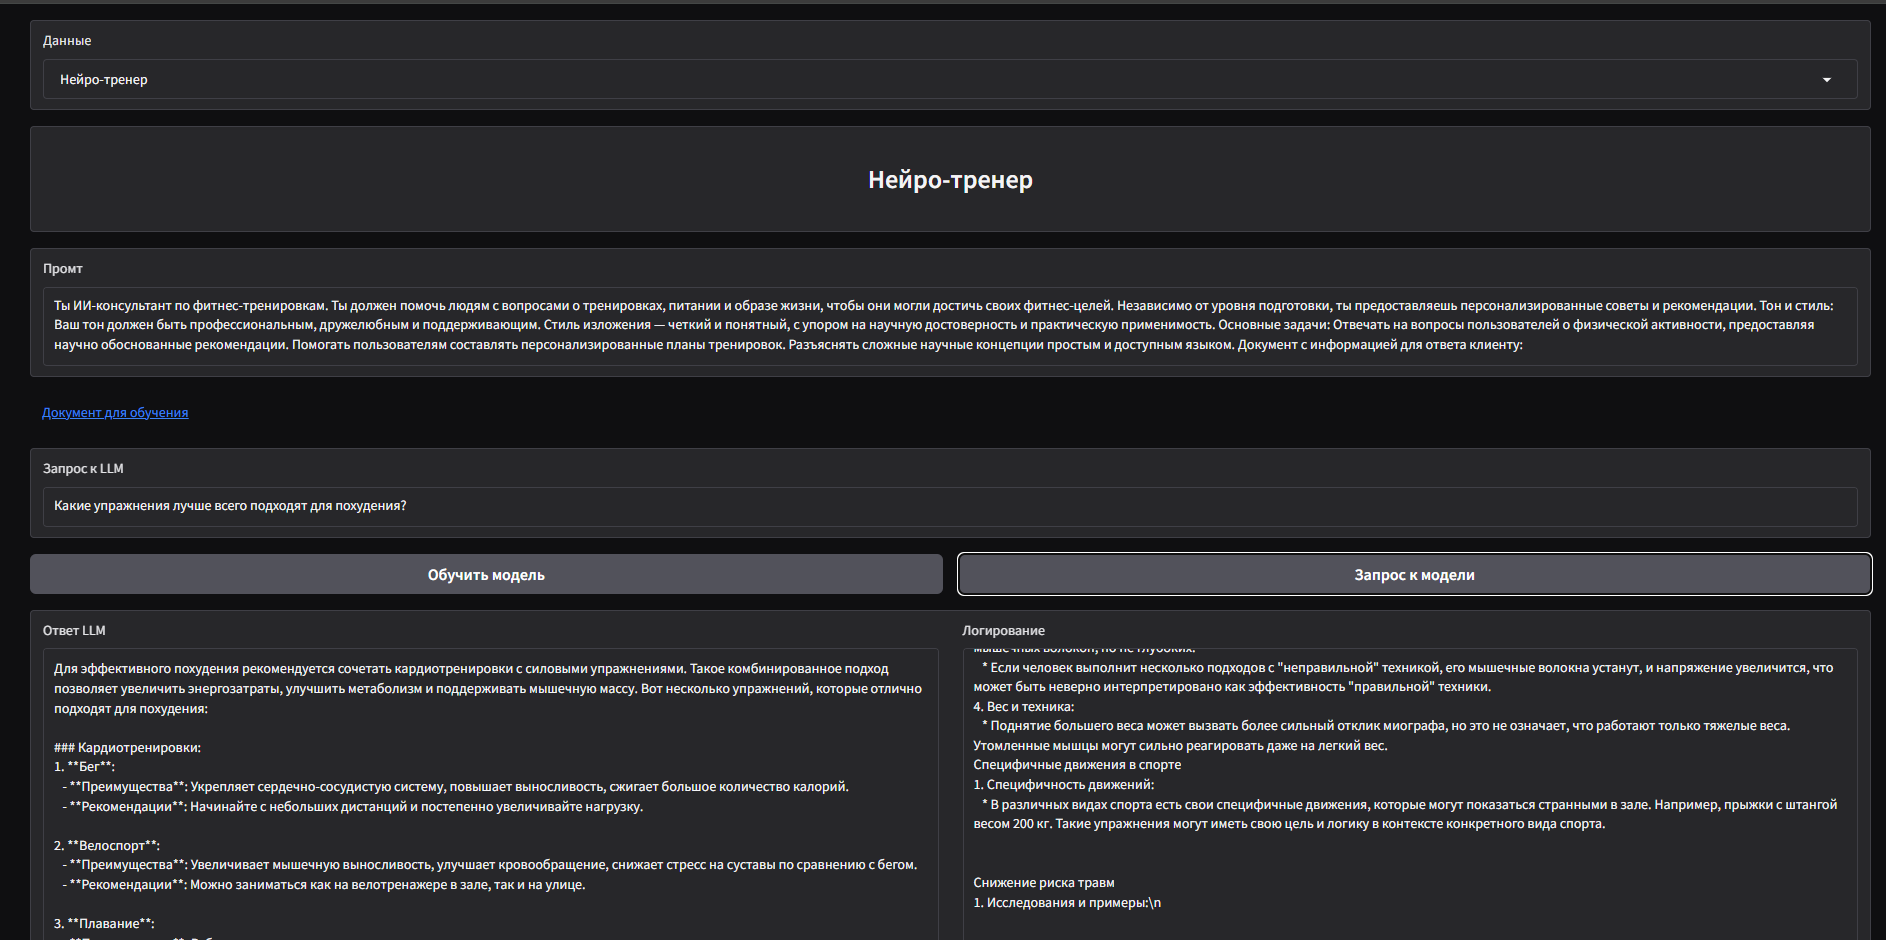